In [ ]:
pip install opencv-python pillow


In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0


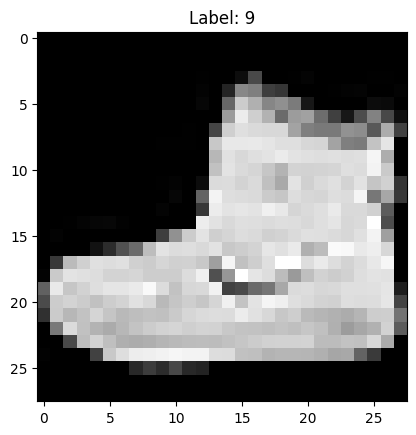

In [ ]:
# Display the first image in the dataset
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


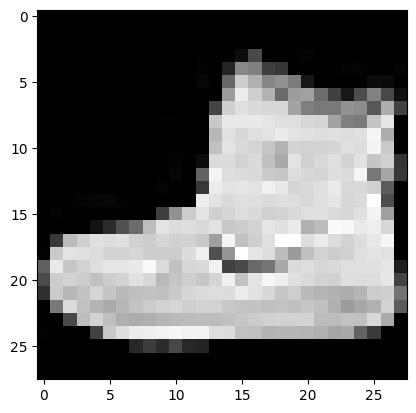

In [ ]:
plt.imshow(train_images[0][:,:,0], cmap='gray')
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.7472 - loss: 0.6942 - val_accuracy: 0.8628 - val_loss: 0.3901
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.8784 - loss: 0.3317 - val_accuracy: 0.8867 - val_loss: 0.3145
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 33ms/step - accuracy: 0.8996 - loss: 0.2767 - val_accuracy: 0.8935 - val_loss: 0.2914
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9093 - loss: 0.2457 - val_accuracy: 0.8953 - val_loss: 0.2909
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9184 - loss: 0.2202 - val_accuracy: 0.9095 - val_loss: 0.2619
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9259 - loss: 0.1985 - val_accuracy: 0.9086 - val_loss: 0.2560
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9325 - loss: 0.1788 - val_accuracy: 0.9089 - val_loss: 0.2574
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9391 -

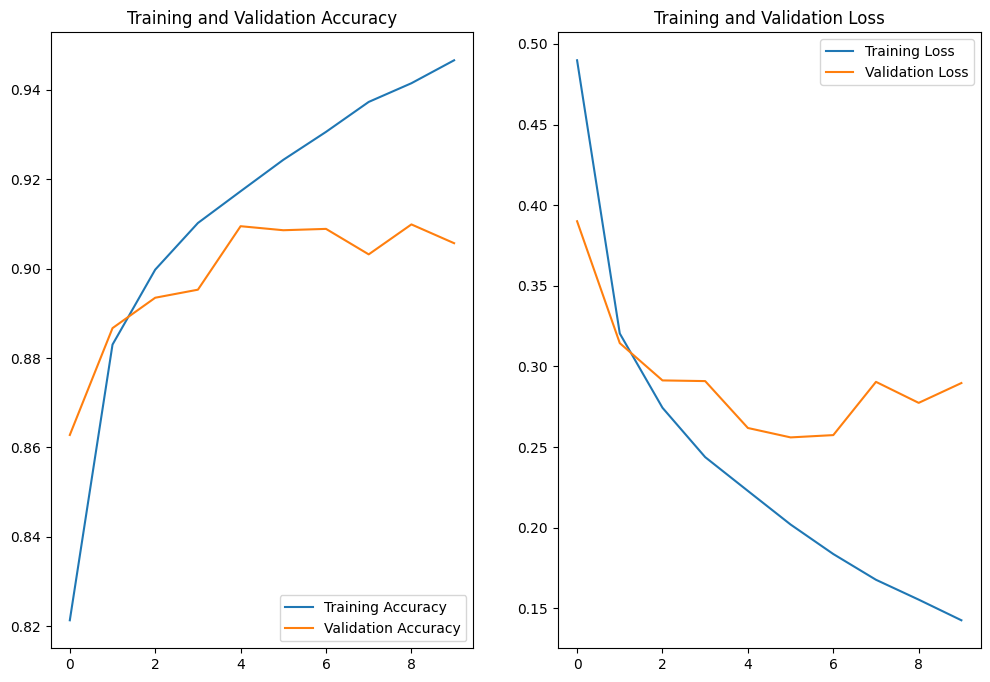

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9061 - loss: 0.3088
Test accuracy: 0.9057


In [ ]:
predictions = model.predict(test_images)

# Predict the label of the first test image
predicted_label = np.argmax(predictions[0])
print(f"Predicted label: {class_names[predicted_label]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Predicted label: Ankle boot


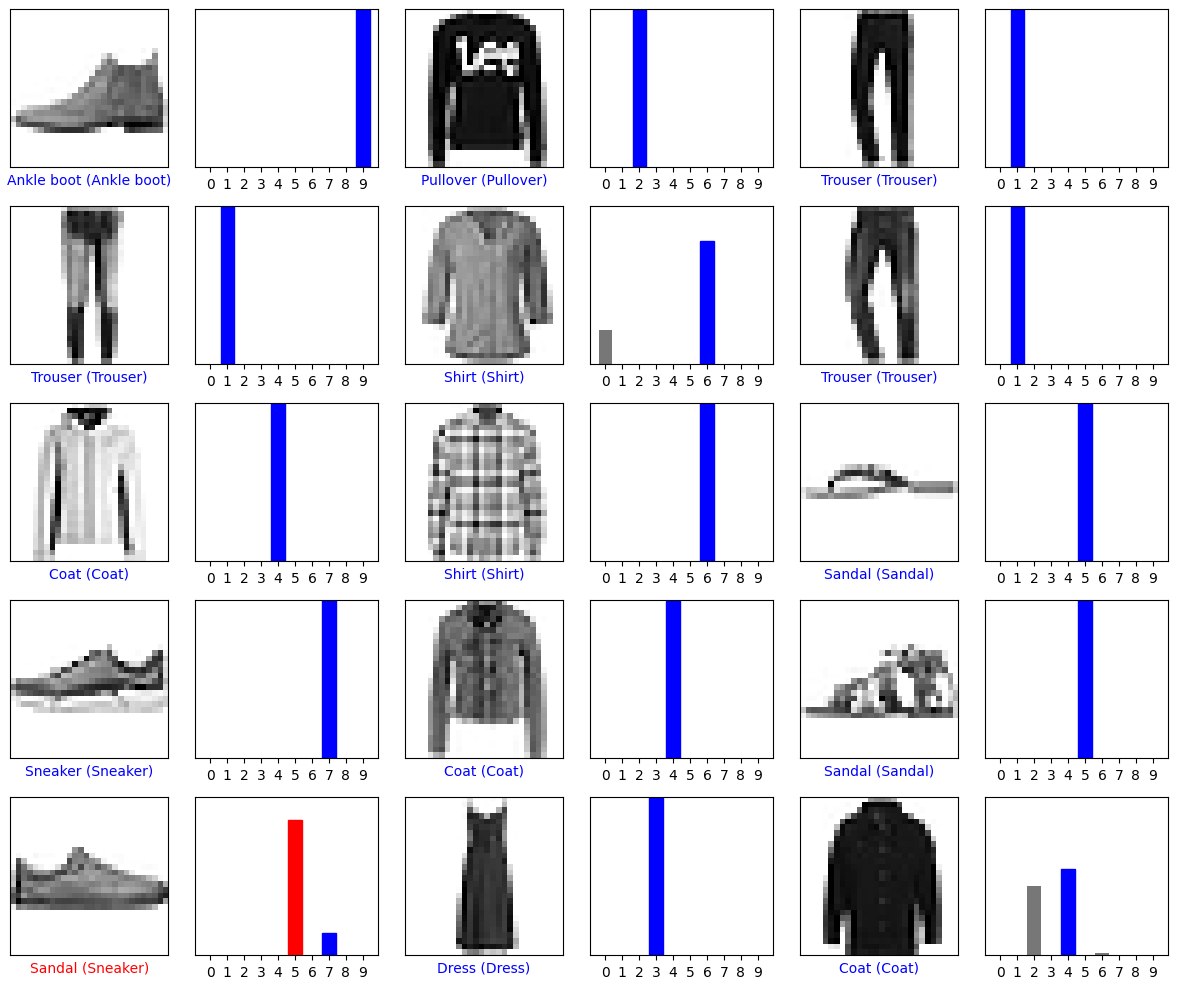

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9061 - loss: 0.3088
Test accuracy: 0.9057


In [ ]:
from PIL import Image
import numpy as np

def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale

    # Resize the image to 28x28 pixels
    img = img.resize((28, 28))

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Normalize the pixel values
    img_array = img_array / 255.0

    # Reshape the image to add batch dimension and channel
    img_array = img_array.reshape((1, 28, 28, 1))

    return img_array


In [ ]:
image_path = "/content/download (3).jpg"  # Replace with your image path

preprocessed_image = preprocess_image(image_path)


In [ ]:
predictions = model.predict(preprocessed_image)
predicted_label = np.argmax(predictions[0])
predicted_class = class_names[predicted_label]

print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class: Bag


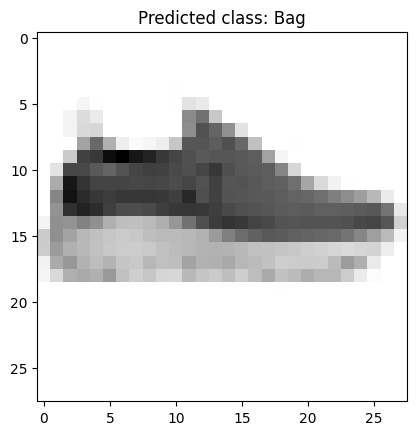

In [ ]:
plt.imshow(preprocessed_image[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted class: {predicted_class}")
# plt.axis('off')
plt.show()


In [ ]:
model.save('fashion_mnist_model.h5')

In [ ]:
model.save('my_model.keras')

In [ ]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('my_model.keras')

# Convert the model to the TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a file
with open('fashion_mnist_model.tflite', 'wb') as f:
    f.write(tflite_model)
